In [8]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method
from cellphonedb.utils import db_utils
import os
import pandas as pd
import sys
import ktplotspy as kpy
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sn

In [23]:
os.getcwd()

'C:\\Users\\Joel\\Documents\\Xue_Lab\\Projects\\EAU\\Data\\CITE-seq\\CellPhoneDB'

In [2]:
db_utils.download_database("cpdb/db", "v4.1.0")

Downloaded cellphonedb.zip into cpdb/db
Downloaded complex_input.csv into cpdb/db
Downloaded gene_input.csv into cpdb/db
Downloaded interaction_input.csv into cpdb/db
Downloaded protein_input.csv into cpdb/db
Downloaded uniprot_synonyms.tsv into cpdb/db\sources


In [4]:
cpdb_file_path="cpdb/db/cellphonedb.zip"
meta_file_path="cpdb/CPDB/eau1_metadata.txt"
counts_file_path="cpdb/CPDB/eau1.h5ad"
output_path="results"

meta = pd.read_csv(meta_file_path, sep="\t")
adata = ad.read_h5ad(counts_file_path)

In [ ]:
deconvoluted, means, pvalues, significant_means = cpdb_statistical_analysis_method.call(
    cpdb_file_path=cpdb_file_path,
    meta_file_path=meta_file_path,
    counts_file_path=counts_file_path,
    counts_data="hgnc_symbol",
    output_path=output_path,
    separator="|",
    threshold=0.1,
    result_precision=3,
    output_suffix="EAU01"
)

In [2]:
m = pd.read_csv("results/statistical_analysis_means_EAU01.txt", sep="\t")
p = pd.read_csv("results/statistical_analysis_pvalues_EAU01.txt", sep="\t")
d = pd.read_csv("results/statistical_analysis_deconvoluted_EAU01.txt", sep="\t")

In [5]:
ints = kpy.plot_cpdb_heatmap(adata=adata,
                     pvals=p,
                     celltype_key="ic_cluster",
                     cmap="viridis", 
                     return_tables = True)

network = ints["count_network"]
total_ints = ints["interaction_count"]
edges = ints["interaction_edges"]

In [ ]:
network.to_csv("results/CPDB_network_EAU01.txt", sep="\t")
total_ints.to_csv("results/CPDB_total-interactions_EAU01.txt", sep="\t")
edges.to_csv("results/CPDB_edges_EAU01.txt", sep="\t")

In [6]:
retina = ["Amacrine Cells", "Cone Bipolar Cells", "Cones", "Muller Glia", "RPE", "Rod Bipolar Cells", "Rods"]
immune = ["CD8+ T cells", "Microglia", "Monocytes", "NK cells", "Naive CD4+ T cells", "Neutrophils", "Th1 Cells", "Th17/gd T cells", "Tregs", "pDCs"]

meta NOT subset; don't know how to subset; dropped


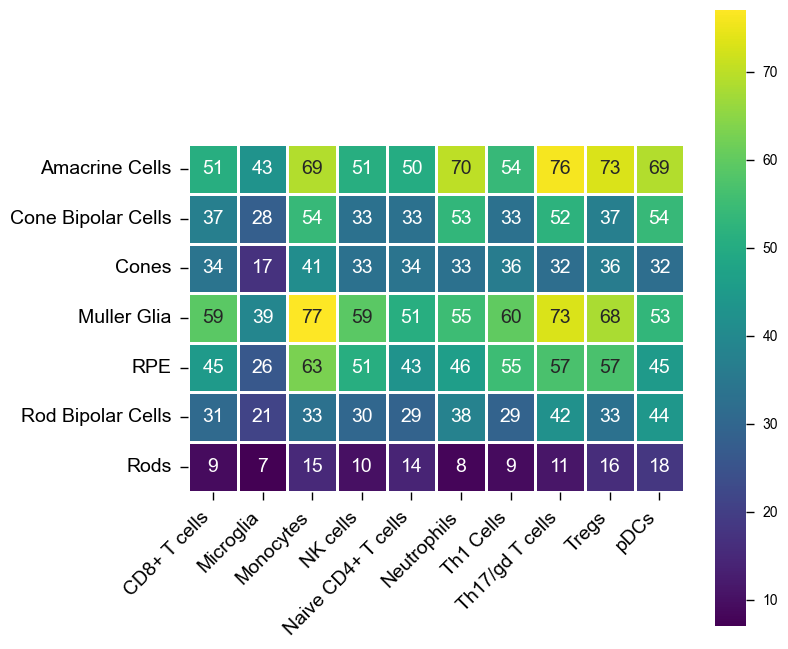

In [12]:
fig, ax = plt.subplots(figsize=(8,8))

hm1 = sn.heatmap(network.loc[retina][immune], annot=True, cmap="viridis", linewidth=1, fmt="g", square=True, annot_kws={"size":14})
hm1.set_xticklabels(hm1.get_xticklabels(), rotation=45, horizontalalignment="right")
hm1.tick_params(labelsize=14)
plt.savefig("./Plots/CPDB_summary-heatmap_EAU01.pdf", dpi=300, bbox_inches="tight")

In [127]:
network.loc[retina][immune].sum(axis=1)

Amacrine Cells        606
Cone Bipolar Cells    414
Cones                 328
Muller Glia           594
RPE                   488
Rod Bipolar Cells     330
Rods                  117
dtype: int64

In [18]:
from cellphonedb.utils import search_utils

In [21]:
search_results = search_utils.search_analysis_results(
    query_cell_types_1 = ['Muller Glia'],  # List of cells 1, will be paired to cells 2 (list or 'All').
    query_cell_types_2 = ['Monocytes'],     # List of cells 2, will be paired to cells 1 (list or 'All').
    significant_means = significant_means,                          # significant_means file generated by CellPhoneDB.
    deconvoluted = deconvoluted,                                    # devonvoluted file generated by CellPhoneDB.
    separator = '|',                                                # separator (default: |) employed to split cells (cellA|cellB).
    long_format = True                                              # converts the output into a wide table, removing non-significant interactions
)

In [59]:
cpdb_file_path="cpdb/db/cellphonedb.zip"
meta_file_path="cpdb/CPDB/eau2_metadata.txt"
counts_file_path="cpdb/CPDB/eau2.h5ad"
output_path="results"

meta = pd.read_csv(meta_file_path, sep="\t")

adata = ad.read_h5ad(counts_file_path)

deconvoluted, means, pvalues, significant_means = cpdb_statistical_analysis_method.call(
    cpdb_file_path=cpdb_file_path,
    meta_file_path=meta_file_path,
    counts_file_path=counts_file_path,
    counts_data="hgnc_symbol",
    output_path=output_path,
    separator="|",
    threshold=0.1,
    result_precision=3,
    output_suffix="EAU02"
)

Reading user files...
The following user files were loaded successfully:
cpdb/CPDB/eau2.h5ad
cpdb/CPDB/eau2_metadata.txt
[ ][CORE][27/11/23-15:52:38][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][27/11/23-15:52:40][INFO] Running Real Analysis
[ ][CORE][27/11/23-15:52:40][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [02:23<00:00,  6.95it/s]

[ ][CORE][27/11/23-15:55:04][INFO] Building Pvalues result


[ ][CORE][27/11/23-15:55:06][INFO] Building results
Saved deconvoluted to results\statistical_analysis_deconvoluted_EAU02.txt
Saved means to results\statistical_analysis_means_EAU02.txt
Saved pvalues to results\statistical_analysis_pvalues_EAU02.txt
Saved significant_means to results\statistical_analysis_significant_means_EAU02.txt


In [64]:
m = pd.read_csv("results/statistical_analysis_means_EAU02.txt", sep="\t")
p = pd.read_csv("results/statistical_analysis_pvalues_EAU02.txt", sep="\t")
d = pd.read_csv("results/statistical_analysis_deconvoluted_EAU02.txt", sep="\t")

In [65]:
ints = kpy.plot_cpdb_heatmap(adata=adata,
                     pvals=p,
                     celltype_key="ic_cluster",
                     cmap="viridis", 
                     return_tables = True)

network = ints["count_network"]
total_ints = ints["interaction_count"]
edges = ints["interaction_edges"]

network.to_csv("results/CPDB_network_EAU02.txt", sep="\t")
total_ints.to_csv("results/CPDB_total-interactions_EAU02.txt", sep="\t")
edges.to_csv("results/CPDB_edges_EAU02.txt", sep="\t")

<Axes: >

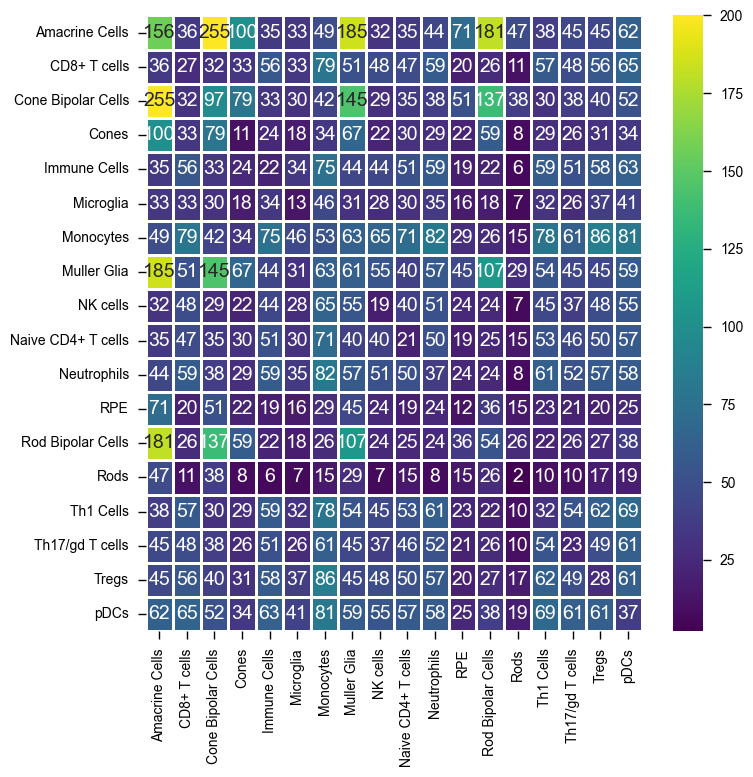

In [66]:
fig, ax = plt.subplots(figsize=(8,8))

sn.heatmap(network, annot=True, cmap="viridis", vmax=200, linewidth=1, fmt="g", mask=mask, square=True, annot_kws={"size":14})

meta NOT subset; don't know how to subset; dropped


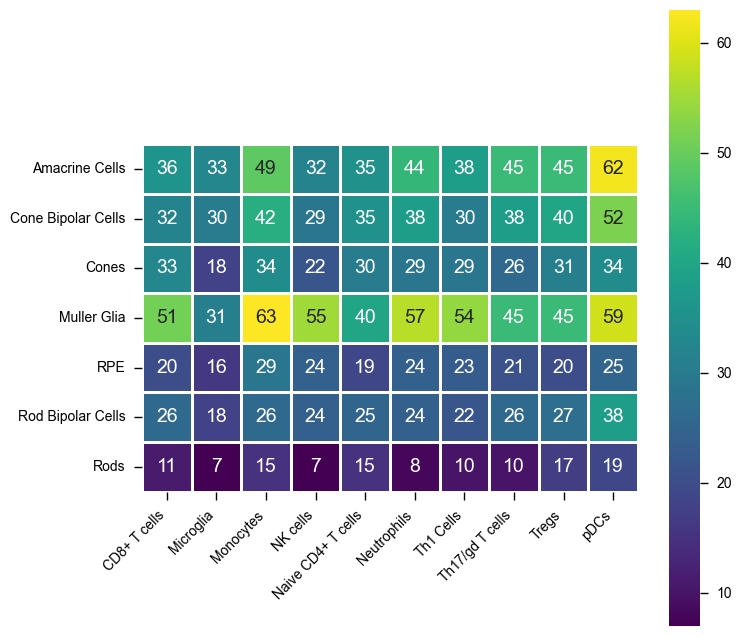

In [118]:
fig, ax = plt.subplots(figsize=(8,8))

hm2 = sn.heatmap(network.loc[retina][immune], annot=True, cmap="viridis", linewidth=1, fmt="g", square=True, annot_kws={"size":14})
hm2.set_xticklabels(hm2.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.savefig("./Plots/CPDB_summary-heatmap_EAU02.pdf", dpi=300, bbox_inches="tight")